In [21]:
import numpy as np
import networkx as nx
import community
from community import community_louvain
import collections
import operator
import matplotlib.pyplot as plt

In [4]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(-1.0974935436679334,
 1.0161950135661573,
 -0.3961495441758728,
 0.6161809844338988)

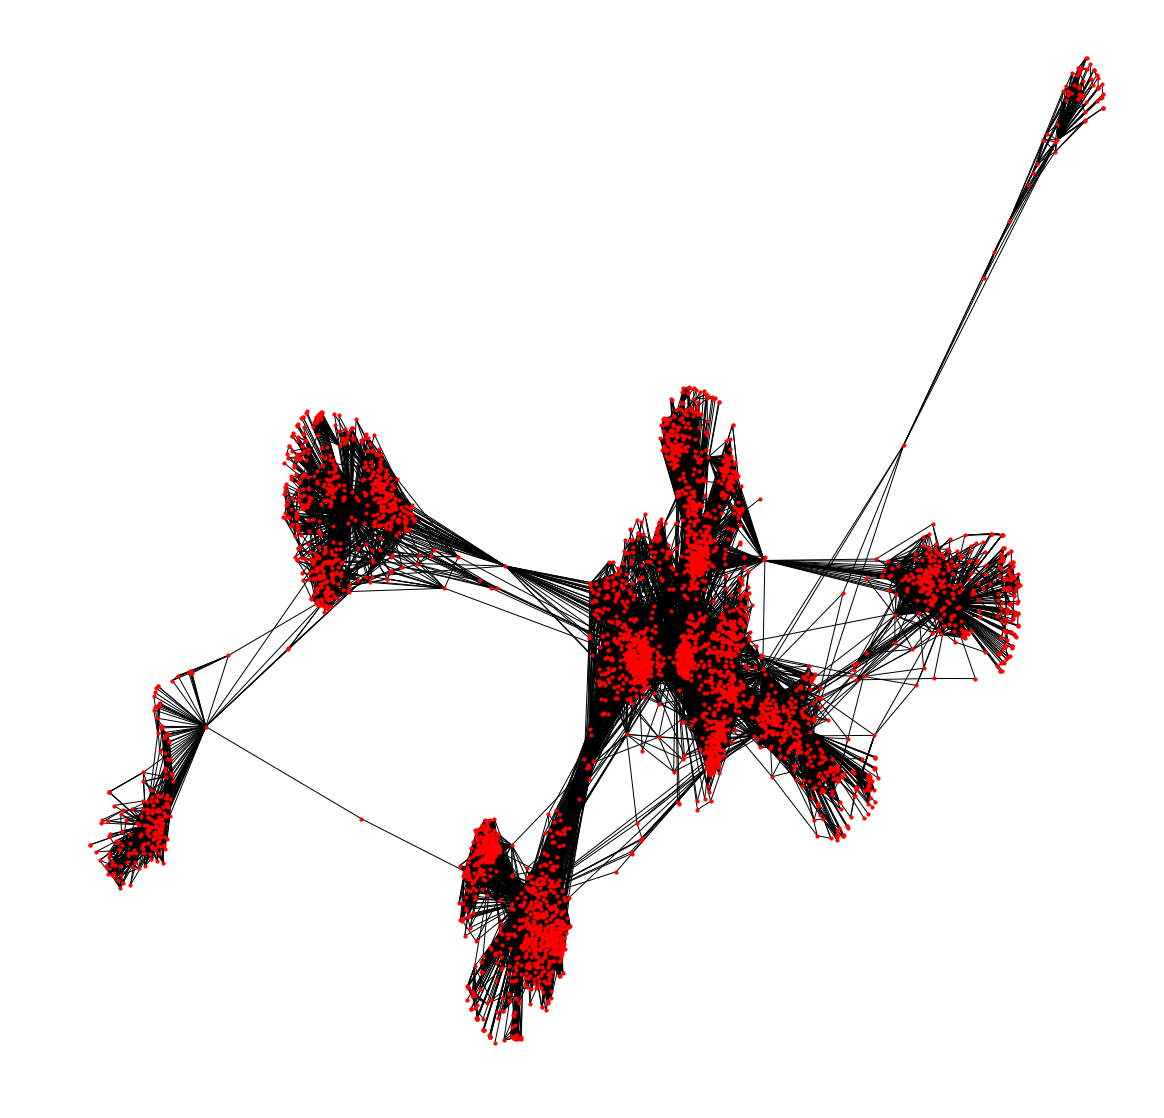

In [10]:
pos = nx.spring_layout(G_fb)
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb,pos=pos,with_labels=False, node_size=10)
plt.axis('off')

In [20]:
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

(-2.6777209935820805,
 3.2288483380535578,
 -3.827751717298438,
 2.1108480879579754)

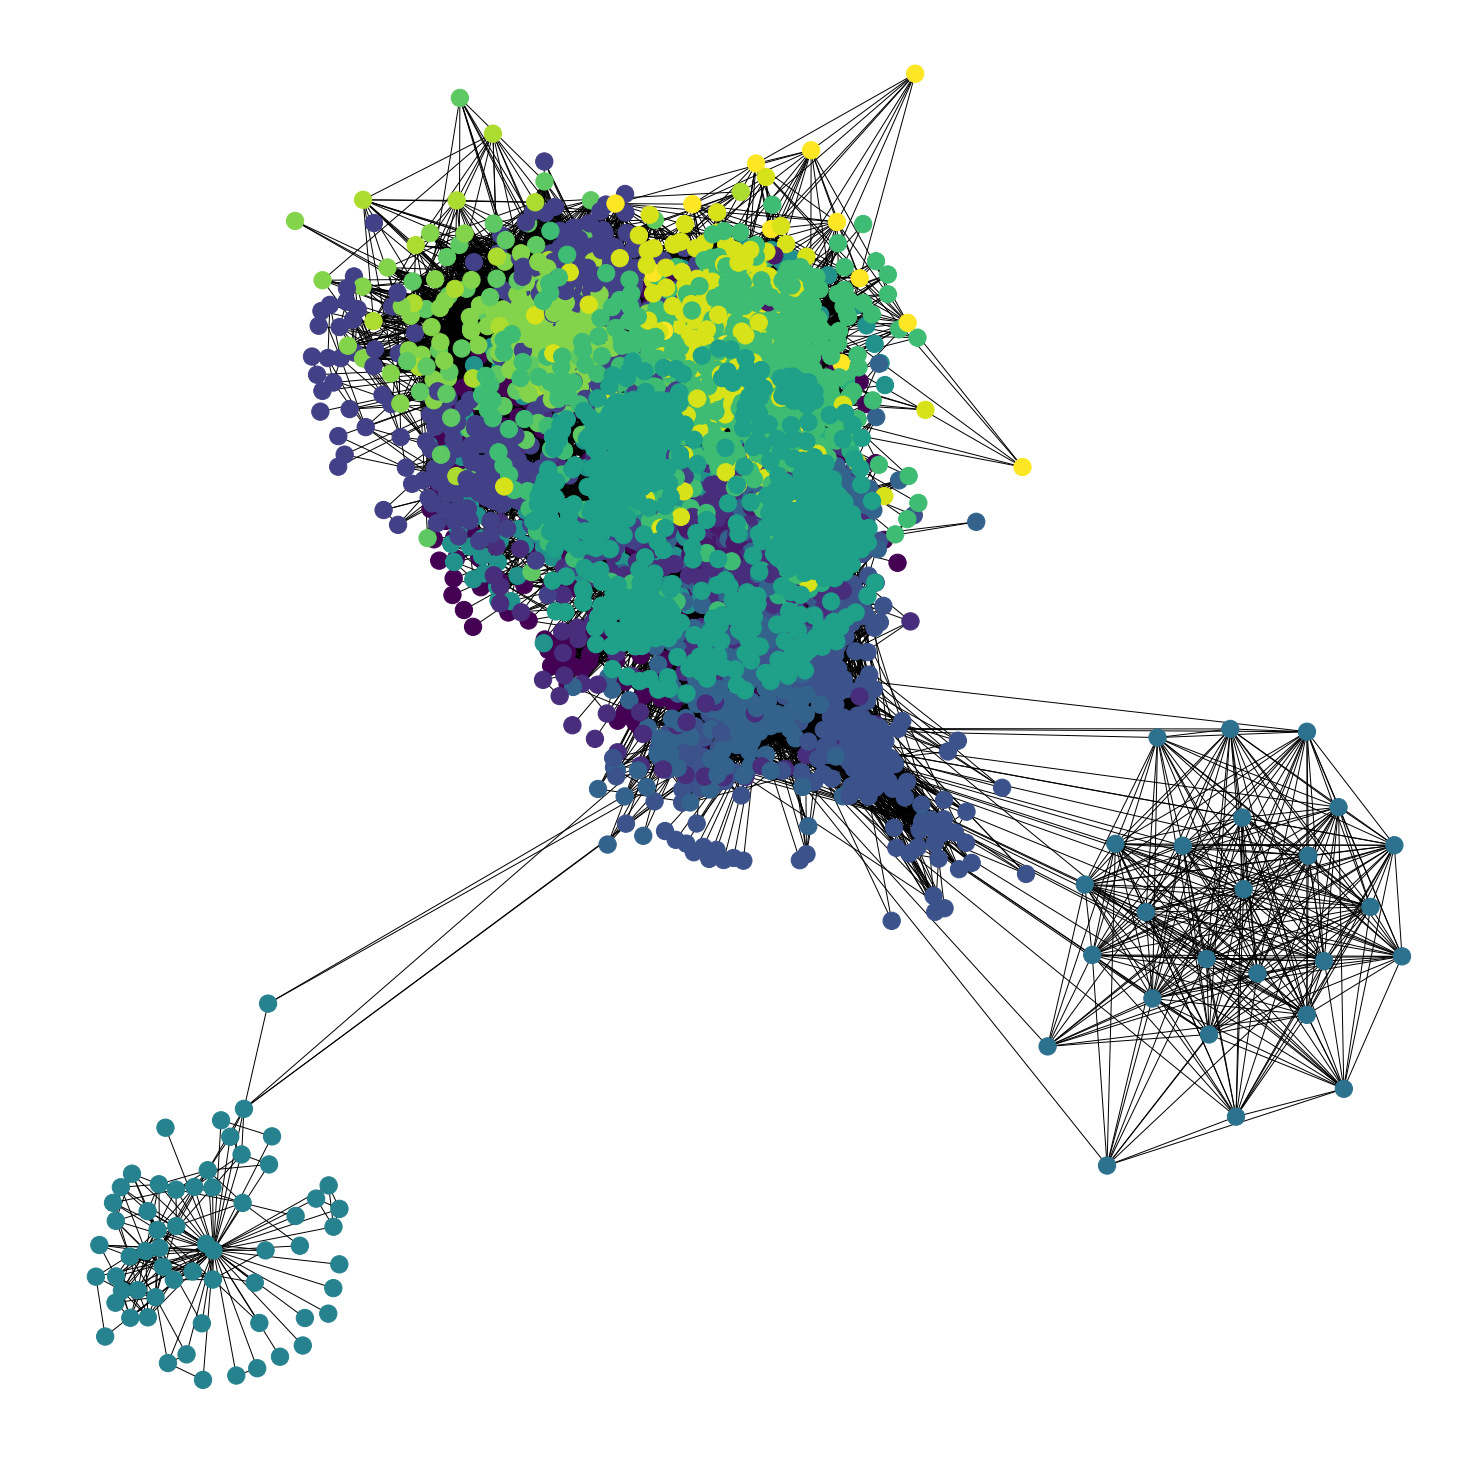

In [29]:
partition = community_louvain.best_partition(G_fb)
pos = community_layout(G_fb, partition)
plt.figure(figsize=(20,20))
nx.draw(G_fb, pos, node_color=list(partition.values()))
plt.axis('off')

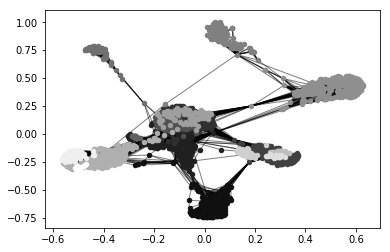

In [25]:
partition = community_louvain.best_partition(G_fb)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G_fb)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G_fb, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_fb, pos, alpha=0.5)
plt.axis('off')

In [43]:
#pos = nx.spring_layout(G_fb)
parts = community_louvain.best_partition(G_fb)
#values = [parts.get(node) for node in G_fb.nodes()]
#plt.figure(figsize=(20,20))
#nx.draw(G_fb, pos, node_color=list(parts.values()))
#plt.axis('off')
collections.Counter(parts.values())

Counter({0: 350,
         1: 444,
         2: 433,
         3: 423,
         4: 313,
         5: 25,
         6: 206,
         7: 548,
         8: 129,
         9: 535,
         10: 73,
         11: 237,
         12: 19,
         13: 226,
         14: 19,
         15: 59})

Text(0.5, 1.0, 'Density of nodes for community')

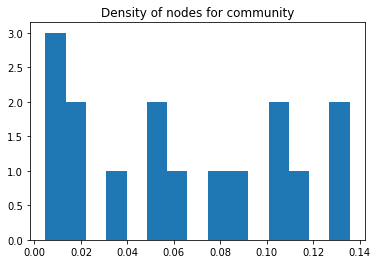

In [61]:
coms = collections.Counter(parts.values())
medidas = [list(coms.values())[i]/sum(list(coms.values())) for i in range(len(list(coms.values())))]
hist, bin_edges = np.histogram(medidas, bins=8, range=None, normed=None, weights=None, density=True)
plt.hist(medidas, bins = 15)
plt.title("Density of nodes for community")

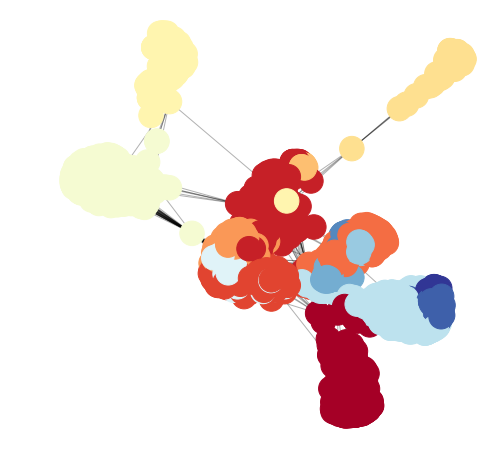

In [33]:
partition = community_louvain.best_partition(G_fb)  # compute communities

pos = nx.spring_layout(G_fb)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(G_fb, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_fb, pos, alpha=0.3)

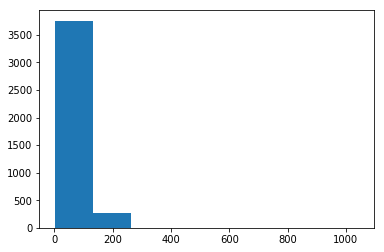

In [62]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees,bins = 8)
    plt.show()

plot_degree_dist(G_fb)

In [65]:
degrees = [val for (node, val) in G_fb.degree()]

##linear binning (N_k/N)
contador=[ 0 for i in range(max(degrees))]
for i in range(max(degrees)):
    for j in range(len(degrees)):
        if degrees[j] == i:
            contador[i]=contador[i]+1
norma=sum(contador)
cuentas=[c/norma for c in contador]
grados=[g for g in range(max(degrees))]

1044

In [84]:
b=0
i=-1
n = len(G_fb.nodes())
contador=[ 0 for i in range(n-1)]
sizes=[]
while (2**i+2**(i-1)) < max(grados):
    i=i+1
    sizes.append(2**i)
    for degree in degrees:
        for a in range(2**i):
            b=2**i+a
            if degree == b:
                contador[i]=contador[i]+1

print(len(contador),len(sizes))
quito = len(contador)-len(sizes)
for k in range(quito):
    del contador[-1]
    
print(len(contador),len(sizes))

i=-1
b=0
gradosmedios=[]
cuentaslog=[]
while (2**i+2**(i-1)) < max(degrees):
    i=i+1
    grads=0
    for a in range(2**i):
        b=2**i+a
        grads=grads+b
    gradosmedios.append(float(grads)/float(2**i))
    cuentaslog.append(float(contador[i])/float(2**i))

cuentaslog=[a/norma for a in cuentaslog]

del gradosmedios[-1]
del cuentaslog[-1]

a=0
while a==0:
    if cuentaslog[0]==0:
        del cuentaslog[0]
        del gradosmedios[0]
    if cuentaslog[0] != 0:
        a=1
del gradosmedios[-1]
del cuentaslog[-1]

4038 11
11 11


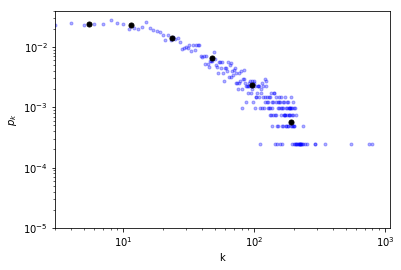

In [86]:
plt.figure(1)
plt.xlim(3,max(degrees)+n/100)
plt.ylim(10**-5,4*10**-2)
plt.xlabel("k")
plt.ylabel(r"$p_k$")
plt.xscale('log')
plt.yscale('log')
plt.plot(grados,cuentas,'b.',alpha=0.3,label="linear binning")
plt.plot(gradosmedios,cuentaslog,'k.',markersize=10,label="logarithmic binning")
#plt.legend()
#plt.show()

# Find nodes with higher degree and betweeness centrality

In [25]:
centrals = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
grados = G_fb.degree()

In [60]:
centrals

{0: 0.14672864694039803,
 1: 0.0004979539685162632,
 2: 0.0004952479848984839,
 3: 0.0004968563035535977,
 4: 0.0004953560143724981,
 5: 0.0004973769441273681,
 6: 0.0004951965979054392,
 7: 0.0006653862289150879,
 8: 0.0004954479854111859,
 9: 0.0005116181609198613,
 10: 0.0004952219149977013,
 11: 0.0004951720722951225,
 12: 0.0004951720722951225,
 13: 0.0004969334714252079,
 14: 0.0004957300830155651,
 15: 0.0004951720722951225,
 16: 0.0004953717679551752,
 17: 0.0004955825356344515,
 18: 0.0004951720722951225,
 19: 0.0005002325232238113,
 20: 0.0004958511052236162,
 21: 0.001432731973282125,
 22: 0.0004958420406012568,
 23: 0.000502029024179513,
 24: 0.0004953087393121357,
 25: 0.0005490262234067426,
 26: 0.0005145168565346672,
 27: 0.0004952027293080184,
 28: 0.0004955530995934977,
 29: 0.0004965668630867019,
 30: 0.0004965408569163509,
 31: 0.0005001022710417224,
 32: 0.0004951720722951225,
 33: 0.0004951720722951225,
 34: 0.004095476547048463,
 35: 0.0004951720722951225,
 36: 0.